In [17]:
import uproot
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

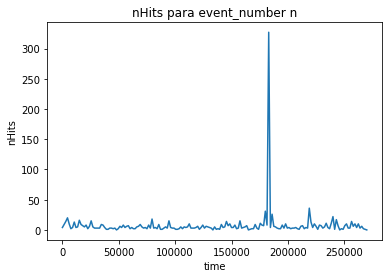

In [18]:
# Paso 1: Leer el DataFrame
df = pd.read_hdf("dataFrames_nHits/nHits_DataFrame_P2.h5", key="df")

# Paso 2: Seleccionar la fila con event_number 1105
# Como event_number es la primera columna, podemos usar .loc o .query:
n_event = 461
fila_n= df.loc[df["event_number"] == n_event]

# fila_1105 es un DataFrame con una fila, extraemos solo las columnas con los datos
# excluimos la columna 'event_number'
datos = fila_n.drop(columns=["event_number"]).values.flatten()

# Paso 3: Graficar usando times_array (los nombres de columna)
times_array = df.columns[1:].astype(int)  # las columnas excepto 'event_number'

plt.figure()
plt.plot(times_array, datos)
plt.xlabel("time")
plt.ylabel("nHits")
plt.title("nHits para event_number n")
plt.show()

0         22.0
1         27.0
2         15.0
3         79.0
4         23.0
         ...  
38563    192.0
38564     22.0
38565     53.0
38566    354.0
38567     19.0
Name: max_value, Length: 38568, dtype: float64


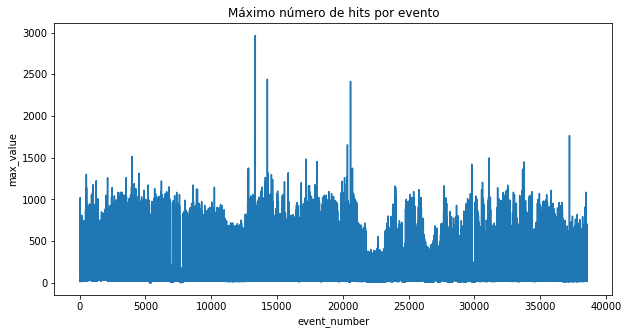

In [19]:
# Calculamos el máximo de cada fila, ignorando la columna 'event_number'
df['max_value'] = df.drop(columns=['event_number']).max(axis=1)
print(df["max_value"])

plt.figure(figsize=(10, 5))
plt.plot(df["event_number"], df["max_value"], linestyle='-')
plt.xlabel("event_number")
plt.ylabel("max_value")
plt.title("Máximo número de hits por evento")
plt.show()

[    8    33    34 ... 38481 38491 38552]
Máximo entre 0–299:     28060 eventos
Máximo entre 300–700:  7400 eventos
Máximo > 701:          3108 eventos


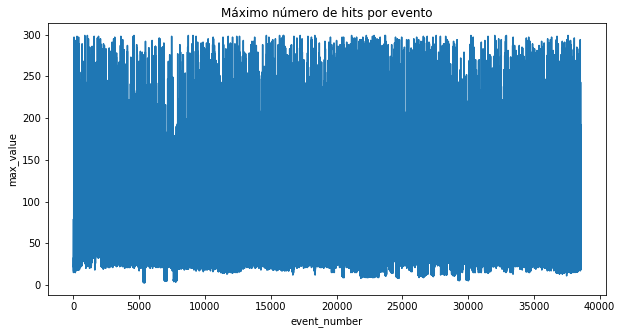

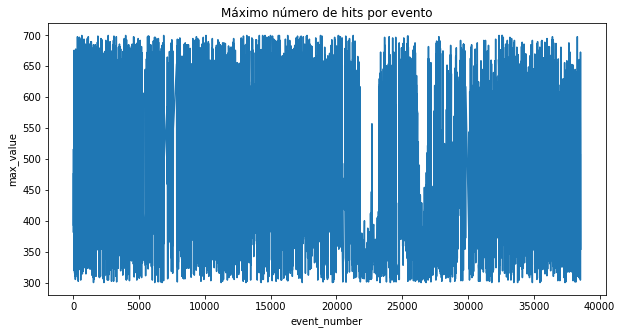

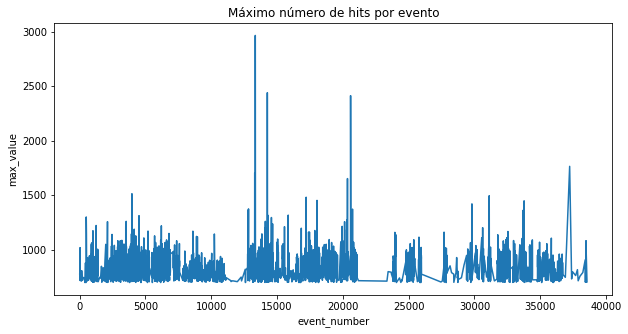

In [20]:
# Condiciones por rangos
count_0_300 = df[(df["max_value"] < 300)].shape[0]
count_300_700 = df[(df["max_value"] >= 300) & (df["max_value"] <= 700)].shape[0]
count_700_up = df[df["max_value"] > 700].shape[0]

eventos_700_up = df[df["max_value"] >= 700]["event_number"].values
print(eventos_700_up)


# Mostrar resultados
print(f"Máximo entre 0–299:     {count_0_300} eventos")
print(f"Máximo entre 300–700:  {count_300_700} eventos")
print(f"Máximo > 701:          {count_700_up} eventos")

plt.figure(figsize=(10, 5))
plt.plot(df[(df["max_value"] < 300)]["event_number"], df[(df["max_value"] < 300)]["max_value"])
plt.xlabel("event_number")
plt.ylabel("max_value")
plt.title("Máximo número de hits por evento")
plt.show()

plt.figure(figsize=(10, 5))
plt.plot(df[(df["max_value"] >= 300) & (df["max_value"] <= 700)]["event_number"], df[(df["max_value"] >= 300) & (df["max_value"] <= 700)]["max_value"])
plt.xlabel("event_number")
plt.ylabel("max_value")
plt.title("Máximo número de hits por evento")
plt.show()

plt.figure(figsize=(10, 5))
plt.plot(df[df["max_value"] > 700]["event_number"], df[df["max_value"] > 700]["max_value"])
plt.xlabel("event_number")
plt.ylabel("max_value")
plt.title("Máximo número de hits por evento")
plt.show()


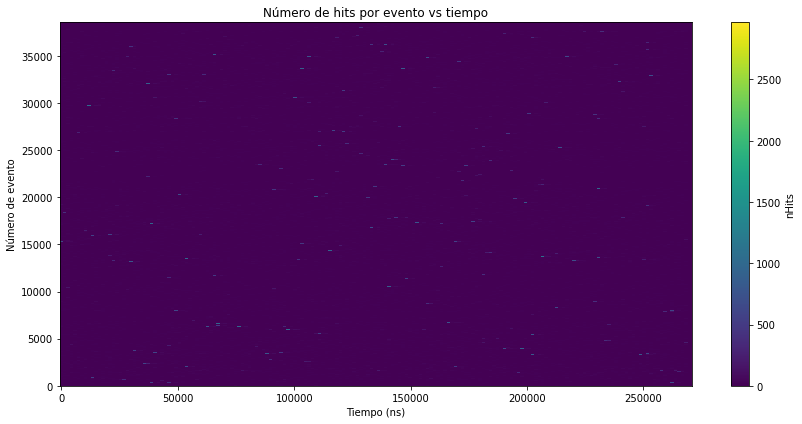

In [21]:
# Extraemos solo las columnas de tiempos (como strings inicialmente)
data = df.drop(columns=["event_number", "max_value"])

# Convertimos los nombres de las columnas a enteros (eje X)
x = data.columns.astype(int).to_numpy()

# El eje Y son simplemente índices: un valor por fila (número de eventos)
y = df["event_number"].to_numpy()

# Los valores de Z son el contenido del DataFrame (nHits)
z = data.to_numpy()

plt.figure(figsize=(12, 6))

# Creamos la malla de coordenadas X, Y para pcolormesh
X, Y = np.meshgrid(x, y)

# Dibujamos el mapa de color
pcm = plt.pcolormesh(X, Y, z, shading='auto', cmap='viridis')

# Etiquetas y colorbar
plt.xlabel("Tiempo (ns)")
plt.ylabel("Número de evento")
plt.title("Número de hits por evento vs tiempo")
cbar = plt.colorbar(pcm)
cbar.set_label("nHits")

plt.tight_layout()
plt.show()


In [22]:
df_promt = df[(df["max_value"] >= 300) & (df["max_value"] <= 1000)].copy()
df_promt["idxmax"] = df_promt.drop(columns=['event_number', 'max_value']).idxmax(axis=1).astype(int)

keep_mask = []
for i, row in df_promt.iterrows():
    t_max = row["idxmax"]  # tiempo del máximo
    # Generamos los tiempos vecinos: t-2, t-1, t+1, t+2
    n=50
    vecinos = np.arange(t_max-n*1500, t_max+n*1500+1, 1500)
    vecinos = vecinos[vecinos != t_max]
    
    vecinos_validos = [v for v in vecinos if v in df_promt.drop(columns=['idxmax', 'event_number', 'max_value']).columns.astype(int)]
    vecinos_validos = [str(int(v)) for v in vecinos_validos]
    valores_vecinos = row[vecinos_validos]

    if (row[vecinos_validos] > 300).any():
        keep_mask.append(False)
        print("hi", row[vecinos_validos] )
    else:
        keep_mask.append(True)

# Aplicamos el filtro
df_promt = df_promt[keep_mask].reset_index(drop=True)

num_filas = df_promt.shape[0]
print("Número de filas-posibles eventos - pico entre 300 y 700 nHits y sin otros picos en 4500 ns al rededor:", num_filas)

hi 43500      3.0
45000      3.0
46500      2.0
48000      5.0
49500      1.0
          ... 
187500     9.0
189000     1.0
190500    14.0
192000     9.0
193500     2.0
Name: 65, Length: 100, dtype: float64
hi 0         0.0
1500      2.0
3000      0.0
4500      9.0
6000      5.0
         ... 
105000    4.0
106500    4.0
108000    3.0
109500    1.0
111000    2.0
Name: 136, Length: 74, dtype: float64
hi 0          3.0
1500       4.0
3000       3.0
4500       8.0
6000       3.0
          ... 
109500     4.0
111000    13.0
112500    10.0
114000     4.0
115500    10.0
Name: 142, Length: 77, dtype: float64
hi 123000    6.0
124500    3.0
126000    1.0
127500    8.0
129000    1.0
         ... 
264000    2.0
265500    7.0
267000    2.0
268500    2.0
270000    0.0
Name: 155, Length: 98, dtype: float64
hi 151500     7.0
153000     8.0
154500    11.0
156000     7.0
157500     2.0
          ... 
264000     1.0
265500     5.0
267000     6.0
268500     1.0
270000     0.0
Name: 161, Length: 79, dtype: 

In [23]:
df_promt.to_hdf("dataFrames_nHits/Filtered_df/nHits_DataFrame_P2_Prompt.h5", key="df", mode="w")

OSError: ``/home/cgarcia_2002/notebooks_firstTest/dataFrames_nHits/Filtered_df`` does not exist

In [ ]:
print(df_promt)

      event_number     0  1500  3000  4500  6000   7500  9000  10500  12000  \
0                0   7.0   4.0  11.0   6.0   4.0   18.0   5.0    4.0   24.0   
1                1  13.0   1.0   2.0   2.0  18.0    1.0   2.0    7.0   10.0   
2                2   8.0   6.0   2.0   1.0   1.0   19.0   6.0    3.0    3.0   
3                3  27.0  10.0   2.0  17.0   4.0    2.0  10.0    3.0    2.0   
4                8   3.0   9.0   8.0   3.0   5.0    4.0  12.0    3.0    2.0   
...            ...   ...   ...   ...   ...   ...    ...   ...    ...    ...   
1773          6445  11.0  23.0   6.0   0.0   6.0    3.0   2.0    3.0    2.0   
1774          6448   6.0   2.0   2.0   3.0   1.0    5.0   4.0    5.0    3.0   
1775          6449   3.0   2.0   1.0   3.0   2.0    6.0   6.0    3.0    5.0   
1776          6452   8.0   3.0   2.0  21.0   1.0  380.0   5.0   19.0    2.0   
1777          6472  12.0   2.0   1.0   2.0   1.0    2.0   7.0    8.0    0.0   

      ...  259500  261000  262500  264000  265500  